# Exploratory Data Analysis (EDA) on Animal Shelter Outcomes

This notebook is used for performing exploratory data analysis on the training dataset of animal shelter outcomes. The goal is to understand the distribution of the outcome types and other features.

<h4>Enter your computer's home firectory</h4>

In [1]:
home_dir = r"/Users/wrngnfreeman/Github/Shelter-Animal-Outcomes-by-kaggle.com"

#### Import required modules

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

sys.path.append(home_dir + r"/src")
import data_processing, utils

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

## Load Training dataset

In [3]:
# Load and process training dataset
processed_df = data_processing.process_data(
    home_dir=home_dir,
    data_file=r"train",
    AnimalID=r"AnimalID",
    dep_var=r"OutcomeType"
)

AnimalID=r"AnimalID"

# Display the first few rows of the dataset
processed_df.head()

,AnimalID,OutcomeType,Name,DateTime,AnimalType,AgeuponOutcome,SexuponOutcome,Sterilization,BreedType,Mix,CoatColor,CoatPattern
0,A006100,Return_to_owner,Scamp,2014-12-20 16:35:00,Dog,<10 years,Male,Sterilized,Sporting,Pure breed,Yellow,NaN
1,A006100,Return_to_owner,Scamp,2014-12-20 16:35:00,Dog,<10 years,Male,Sterilized,Sporting,Pure breed,White,NaN
2,A047759,Transfer,Oreo,2014-04-07 15:12:00,Dog,<15 years,Male,Sterilized,Hound,Pure breed,Tricolor,NaN
3,A134067,Return_to_owner,Bandit,2013-11-16 11:54:00,Dog,15+ years,Male,Sterilized,Herding,Pure breed,Brown,NaN
4,A134067,Return_to_owner,Bandit,2013-11-16 11:54:00,Dog,15+ years,Male,Sterilized,Herding,Pure breed,White,NaN


## Visualizations

### Distribution of the dependent variable "OutcomeType"

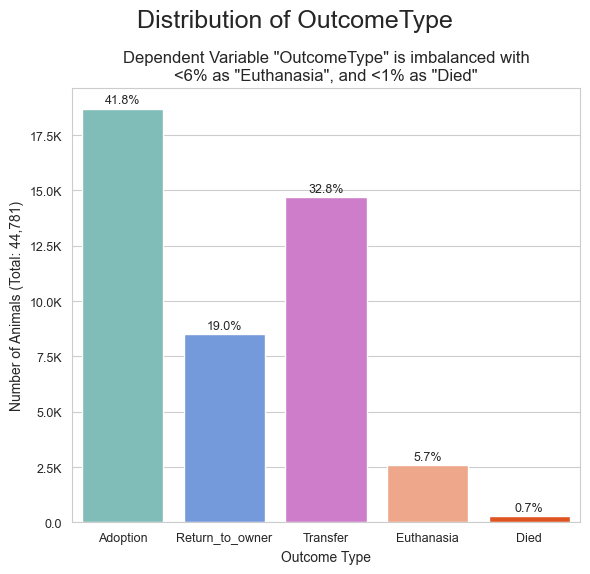

In [4]:
# Define the order and colors for OutcomeType
order = ["Adoption", "Return_to_owner", "Transfer", "Euthanasia", "Died"]
colors = ["#76C7C0", "#6495ED", "#DA70D6", "#FFA07A", "#FF4500"]
# Count the occurrences of each OutcomeType
outcome_counts = processed_df['OutcomeType'].value_counts().reindex(order, fill_value=0)
# Calculate the total number of animals
total_animals = outcome_counts.sum()
# Calculate the percentage of each OutcomeType
percentages = (outcome_counts / total_animals) * 100
# Create a custom palette dictionary
custom_palette = dict(zip(order, colors))
# Create a DataFrame from the counts for plotting
plot_df = pd.DataFrame({'OutcomeType': outcome_counts.index, 'Count': outcome_counts.values})
# Create the bar chart using the pre-calculated data
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='OutcomeType', y='Count', data=plot_df, palette=custom_palette, hue='OutcomeType')
# Set the main title and subtitle
plt.suptitle('Distribution of OutcomeType', fontsize=18)
plt.title('Dependent Variable "OutcomeType" is imbalanced with\n<6% as "Euthanasia", and <1% as "Died"', fontsize=12)
# Set the labels
plt.xlabel('Outcome Type', fontsize=10)
plt.ylabel('Number of Animals (Total: {:,})'.format(total_animals), fontsize=10)
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
ax.yaxis.set_major_formatter(plt.FuncFormatter(utils.format_y_tick))  # Custom formatter for y-axis ticks
# Add percentage labels on top of each bar
for i, count in enumerate(outcome_counts.values):
    ax.text(i, count + 0.005 * max(outcome_counts), f'{percentages.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=9)
# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

### Distribution of AnimalType

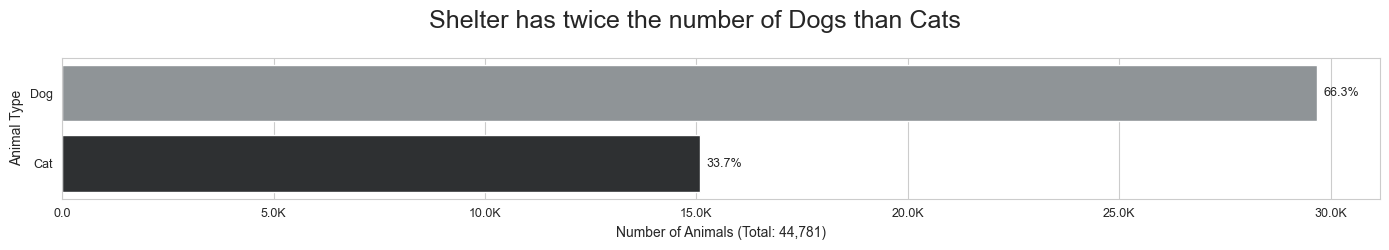

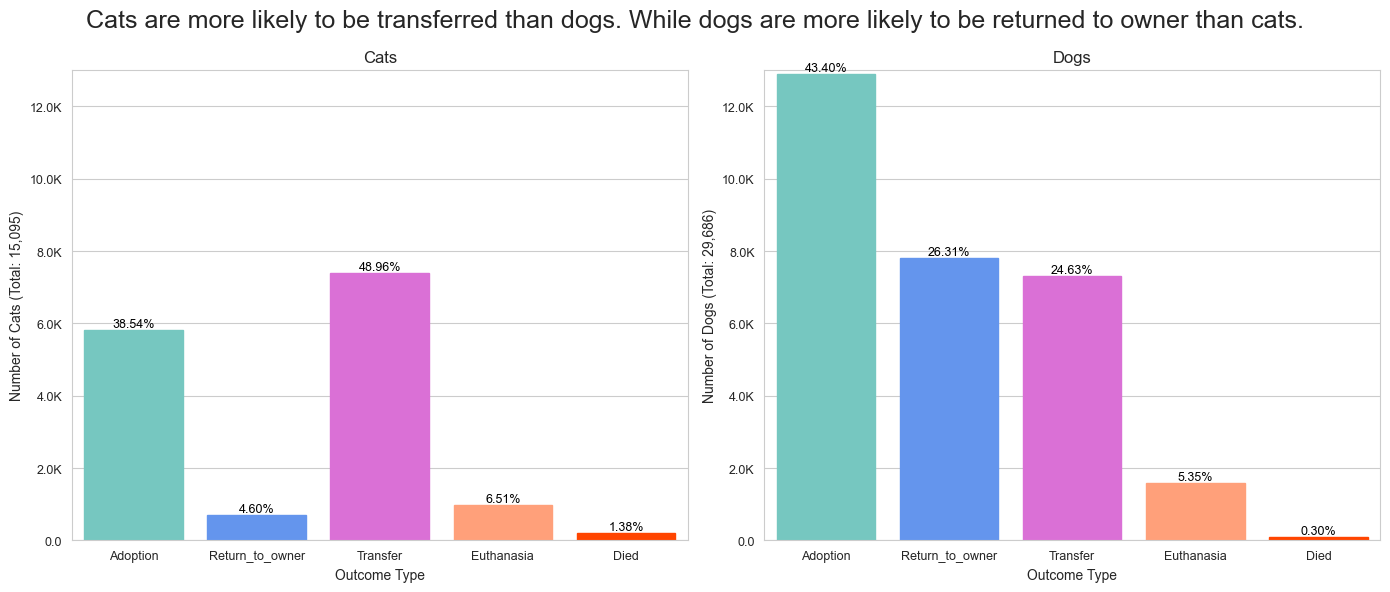

In [5]:
# Define the order and colors for AnimalType
order = ["Dog", "Cat"]
colors = ["#8E9498", "#2D3033"]
# Count the occurrences of each AnimalType
animal_counts = processed_df['AnimalType'].value_counts().reindex(order, fill_value=0)
# Calculate the total number of animals
total_animals = animal_counts.sum()
# Calculate the percentage of each AnimalType
percentages = (animal_counts / total_animals) * 100
# Create a custom palette dictionary
custom_palette = dict(zip(order, colors))
# Create a DataFrame from the counts for plotting
plot_df = pd.DataFrame({'AnimalType': animal_counts.index, 'Count': animal_counts.values})
# Create the horizontal bar chart using the pre-calculated data
plt.figure(figsize=(14, 2.5))
ax = sns.barplot(x='Count', y='AnimalType', data=plot_df, palette=custom_palette, hue='AnimalType')
# Set the main title and subtitle
plt.suptitle('Shelter has twice the number of Dogs than Cats', fontsize=18)
# Set the labels
plt.xlabel('Number of Animals (Total: {:,})'.format(total_animals), fontsize=10)
plt.ylabel('Animal Type', fontsize=10)
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
ax.xaxis.set_major_formatter(plt.FuncFormatter(utils.format_y_tick))  # Custom formatter for y-axis ticks
# Add percentage labels on the right side of each bar
for i, count in enumerate(animal_counts.values):
    ax.text(count + 0.005 * max(animal_counts), i, f'{percentages.iloc[i]:.1f}%', ha='left', va='center', fontsize=9)
# Show the plot
plt.tight_layout()
plt.show()


# Define the order for OutcomeType and colors
order = ["Adoption", "Return_to_owner", "Transfer", "Euthanasia", "Died"]
colors = ["#76C7C0", "#6495ED", "#DA70D6", "#FFA07A", "#FF4500"]
# Create a subplot for Cats and Dogs
plt.figure(figsize=(14, 6))
plt.suptitle('Cats are more likely to be transferred than dogs. While dogs are more likely to be returned to owner than cats.', fontsize=18)
# Filter data for Cats and Dogs
cats_df = processed_df.loc[processed_df['AnimalType']=='Cat', ]
dogs_df = processed_df.loc[processed_df['AnimalType']=='Dog', ]
# Calculate total counts for males and females
total_cats = len(cats_df)
total_dogs = len(dogs_df)
# Determine the maximum count from both datasets
cats_counts = cats_df['OutcomeType'].value_counts().reindex(order).fillna(0)
dogs_counts = dogs_df['OutcomeType'].value_counts().reindex(order).fillna(0)
max_count = ((max(cats_counts.max(), dogs_counts.max()) // 1000) + 1) * 1000
# Plot bar chart for Cats
ax1 = plt.subplot(1, 2, 1)
male_counts = cats_df['OutcomeType'].value_counts().reindex(order).fillna(0)
sns.barplot(x=male_counts.index, y=male_counts.values, order=order, ax=ax1)
plt.title('Cats')
plt.xlabel('Outcome Type')
plt.ylabel(f'Number of Cats (Total: {total_cats:,})', fontsize=10)
plt.ylim(0, max_count)  # Set the y-axis limit to the maximum count
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Set custom colors
for i, bar in enumerate(ax1.patches):
    bar.set_color(colors[i])
# Format y-axis ticks
ax1.yaxis.set_major_formatter(FuncFormatter(utils.format_y_tick))
# Annotate bars with percentages for Cats
for p in ax1.patches:
    height = p.get_height()
    percentage = (height / total_cats) * 100
    ax1.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Plot bar chart for Dogs
ax2 = plt.subplot(1, 2, 2)
female_counts = dogs_df['OutcomeType'].value_counts().reindex(order).fillna(0)
sns.barplot(x=female_counts.index, y=female_counts.values, order=order, ax=ax2)
plt.title('Dogs')
plt.xlabel('Outcome Type')
plt.ylabel(f'Number of Dogs (Total: {total_dogs:,})', fontsize=10)
plt.ylim(0, max_count)  # Set the y-axis limit to the maximum count
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Set custom colors
for i, bar in enumerate(ax2.patches):
    bar.set_color(colors[i])
# Format y-axis ticks
ax2.yaxis.set_major_formatter(FuncFormatter(utils.format_y_tick))
# Annotate bars with percentages for Dogs
for p in ax2.patches:
    height = p.get_height()
    percentage = (height / total_dogs) * 100
    ax2.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

### How does Age determine the outcome of an animal?

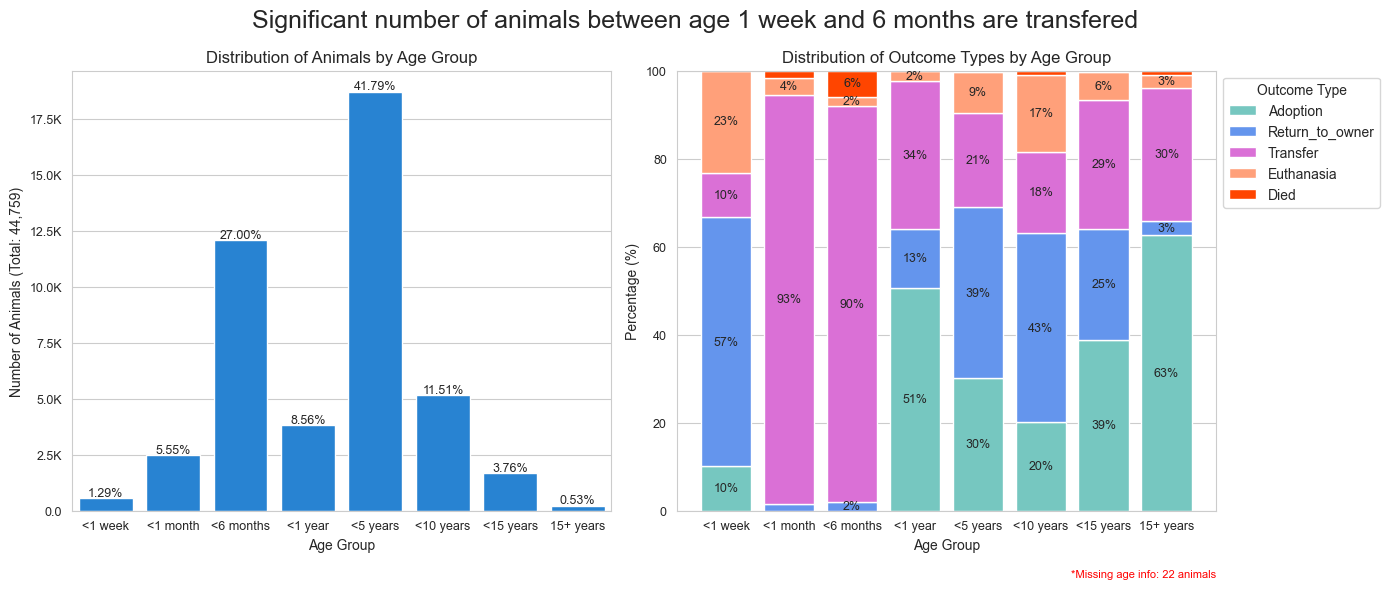

In [6]:
# Define the order and colors for AgeuponOutcome
order = ['<1 week', '<1 month', '<6 months', '<1 year', '<5 years', '<10 years', '<15 years', '15+ years']
# Count the occurrences of each AgeuponOutcome
outcome_counts = processed_df.loc[processed_df["AgeuponOutcome"].notna(), 'AgeuponOutcome'].value_counts().reindex(order, fill_value=0)
missing = len(processed_df.loc[processed_df["AgeuponOutcome"].isna(), 'AgeuponOutcome'])
# Calculate the total number of animals
total_animals = outcome_counts.sum()
# Calculate the percentage of each AgeuponOutcome
percentages_age = (outcome_counts / total_animals) * 100
# Define the order and colors for OutcomeType
order_outcome = ["Adoption", "Return_to_owner", "Transfer", "Euthanasia", "Died"]
colors_outcome = ["#76C7C0", "#6495ED", "#DA70D6", "#FFA07A", "#FF4500"]
# Count the occurrences of each combination of AgeuponOutcome and OutcomeType
pivot_table = processed_df.pivot_table(values='AnimalID', index='AgeuponOutcome', columns='OutcomeType', aggfunc='count', fill_value=0)
# Normalize the pivot table to get percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
# Set up the layout for two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('Significant number of animals between age 1 week and 6 months are transfered', fontsize=18)
# Plot the first bar chart on the left
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='AgeuponOutcome', y='Count',
    data=pd.DataFrame({'AgeuponOutcome': outcome_counts.index, 'Count': outcome_counts.values}),
    color='#0C85EE', ax=axes[0]
)
ax1.set_title('Distribution of Animals by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number of Animals (Total: {:,})'.format(total_animals))
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Apply the custom y-axis formatter to both subplots
formatter = FuncFormatter(utils.format_y_tick)
plt.gca().yaxis.set_major_formatter(formatter)  # This applies to the last subplot by default
for i, count in enumerate(outcome_counts.values):
    ax1.text(i, count + 0.005 * max(outcome_counts), f'{percentages_age.iloc[i]:.2f}%', ha='center', fontsize=9)
# Plot the second bar chart on the right (stacked)
ax2 = plt.subplot(1, 2, 2)
bottom = np.zeros(len(order))
for i, outcome in enumerate(order_outcome):
    ax2.bar(order, pivot_table_percentage[outcome], bottom=bottom, color=colors_outcome[i])
    bottom += pivot_table_percentage[outcome]
bottom = np.zeros(len(order))
for i, outcome in enumerate(order_outcome):
    for j, value in enumerate(pivot_table_percentage[outcome]):
        if value >= 2:
            ax2.text(j, bottom[j] + value / 2, f'{value:.0f}%', ha='center', va='center', fontsize=9)
            bottom[j] += value
        else:
            ax2.text(j, bottom[j] + value / 2, f'{value:.0f}%', alpha=0, ha='center', va='center', fontsize=9)
            bottom[j] += value
# Set the title and labels for the second bar chart
ax2.set_title('Distribution of Outcome Types by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Percentage (%)')
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Add legend
ax2.legend(labels=order_outcome, title='Outcome Type', bbox_to_anchor=(1, 1), loc=2)
# Add footer text
text = "*Missing age info: {:,} animals".format(missing)
ax2.text(1, -0.15, text, transform=ax2.transAxes, ha='right', color='red', fontsize=8)
plt.tight_layout()
plt.show()

### How does sex determine the outcome of an animal?

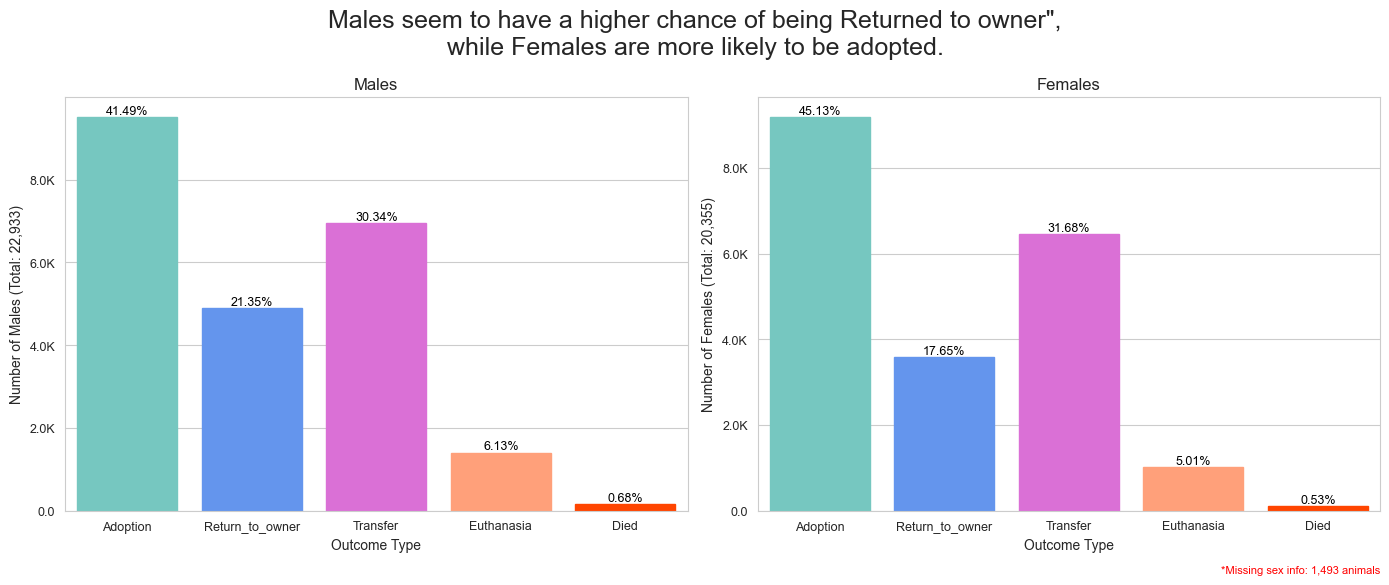

In [7]:
# Define the order for OutcomeType and colors
order = ["Adoption", "Return_to_owner", "Transfer", "Euthanasia", "Died"]
colors = ["#76C7C0", "#6495ED", "#DA70D6", "#FFA07A", "#FF4500"]
# Create a subplot for Males and Females
plt.figure(figsize=(14, 6))
plt.suptitle('Males seem to have a higher chance of being Returned to owner",\nwhile Females are more likely to be adopted.', fontsize=18)
# Filter data for Males and Females
males_df = processed_df.loc[processed_df['SexuponOutcome']=='Male', ]
females_df = processed_df.loc[processed_df['SexuponOutcome']=='Female', ]
missing = len(processed_df) - len(males_df) - len(females_df)
# Calculate total counts for males and females
total_males = len(males_df)
total_females = len(females_df)
# Plot bar chart for Males
ax1 = plt.subplot(1, 2, 1)
male_counts = males_df['OutcomeType'].value_counts().reindex(order).fillna(0)
sns.barplot(x=male_counts.index, y=male_counts.values, order=order, ax=ax1)
plt.title('Males')
plt.xlabel('Outcome Type')
plt.ylabel(f'Number of Males (Total: {total_males:,})', fontsize=10)
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Set custom colors
for i, bar in enumerate(ax1.patches):
    bar.set_color(colors[i])
# Format y-axis ticks
ax1.yaxis.set_major_formatter(FuncFormatter(utils.format_y_tick))
# Annotate bars with percentages for Males
for p in ax1.patches:
    height = p.get_height()
    percentage = (height / total_males) * 100
    ax1.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Plot bar chart for Females
ax2 = plt.subplot(1, 2, 2)
female_counts = females_df['OutcomeType'].value_counts().reindex(order).fillna(0)
sns.barplot(x=female_counts.index, y=female_counts.values, order=order, ax=ax2)
plt.title('Females')
plt.xlabel('Outcome Type')
plt.ylabel(f'Number of Females (Total: {total_females:,})', fontsize=10)
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Set custom colors
for i, bar in enumerate(ax2.patches):
    bar.set_color(colors[i])
# Format y-axis ticks
ax2.yaxis.set_major_formatter(FuncFormatter(utils.format_y_tick))
# Annotate bars with percentages for Females
for p in ax2.patches:
    height = p.get_height()
    percentage = (height / total_females) * 100
    ax2.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Add footer text
text = "*Missing sex info: {:,} animals".format(missing)
ax2.text(1, -0.15, text, transform=ax2.transAxes, ha='right', color='red', fontsize=8)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

### How does Sterilization determine the outcome of an animal?

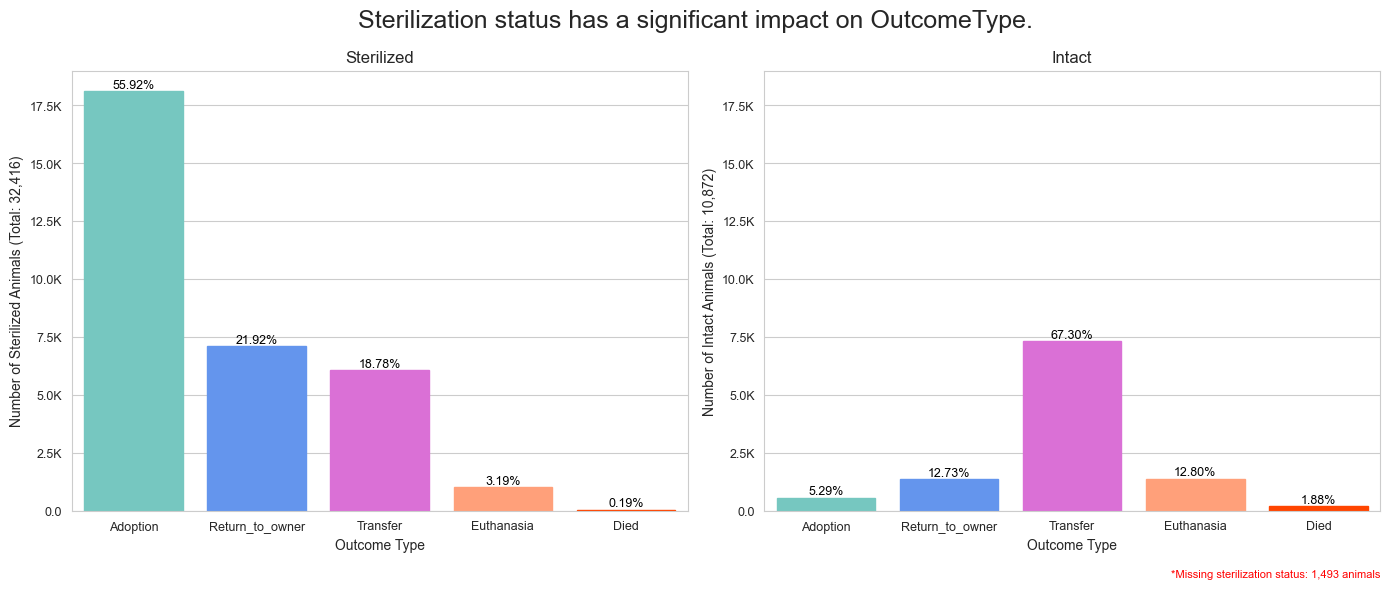

In [8]:
# Define the order for OutcomeType and colors
order = ["Adoption", "Return_to_owner", "Transfer", "Euthanasia", "Died"]
colors = ["#76C7C0", "#6495ED", "#DA70D6", "#FFA07A", "#FF4500"]
# Create a subplot for Sterilization Type
plt.figure(figsize=(14, 6))
plt.suptitle('Sterilization status has a significant impact on OutcomeType.', fontsize=18)
# Filter data for both Sterilization Types
sterilized_df = processed_df.loc[processed_df['Sterilization']=='Sterilized', ]
intact_df = processed_df.loc[processed_df['Sterilization']=='Intact', ]
missing = len(processed_df) - len(sterilized_df) - len(intact_df)
# Calculate total counts for both Sterilization Type
total_sterilized = len(sterilized_df)
total_intact = len(intact_df)
# Determine the maximum count from both datasets
sterilized_counts = sterilized_df['OutcomeType'].value_counts().reindex(order).fillna(0)
intact_counts = intact_df['OutcomeType'].value_counts().reindex(order).fillna(0)
max_count = ((max(sterilized_counts.max(), intact_counts.max()) // 1000) + 1) * 1000
# Plot bar chart for Sterilized animals
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x=sterilized_counts.index, y=sterilized_counts.values, order=order, ax=ax1)
plt.title('Sterilized')
plt.xlabel('Outcome Type')
plt.ylabel(f'Number of Sterilized Animals (Total: {total_sterilized:,})', fontsize=10)
plt.ylim(0, max_count)  # Set the y-axis limit to the maximum count
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Set custom colors
for i, bar in enumerate(ax1.patches):
    bar.set_color(colors[i])
# Format y-axis ticks
ax1.yaxis.set_major_formatter(FuncFormatter(utils.format_y_tick))
# Annotate bars with percentages for Sterilized animals
for p in ax1.patches:
    height = p.get_height()
    percentage = (height / total_sterilized) * 100
    ax1.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Plot bar chart for Intact animals
ax2 = plt.subplot(1, 2, 2)
sns.barplot(x=intact_counts.index, y=intact_counts.values, order=order, ax=ax2)
plt.title('Intact')
plt.xlabel('Outcome Type')
plt.ylabel(f'Number of Intact Animals (Total: {total_intact:,})', fontsize=10)
plt.ylim(0, max_count)  # Set the y-axis limit to the maximum count
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Set custom colors
for i, bar in enumerate(ax2.patches):
    bar.set_color(colors[i])
# Format y-axis ticks
ax2.yaxis.set_major_formatter(FuncFormatter(utils.format_y_tick))
# Annotate bars with percentages for Intact animals
for p in ax2.patches:
    height = p.get_height()
    percentage = (height / total_intact) * 100
    ax2.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Add footer text
text = "*Missing sterilization status: {:,} animals".format(missing)
ax2.text(1, -0.15, text, transform=ax2.transAxes, ha='right', color='red', fontsize=8)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

### How does CoatColor determine the outcome of an animal?

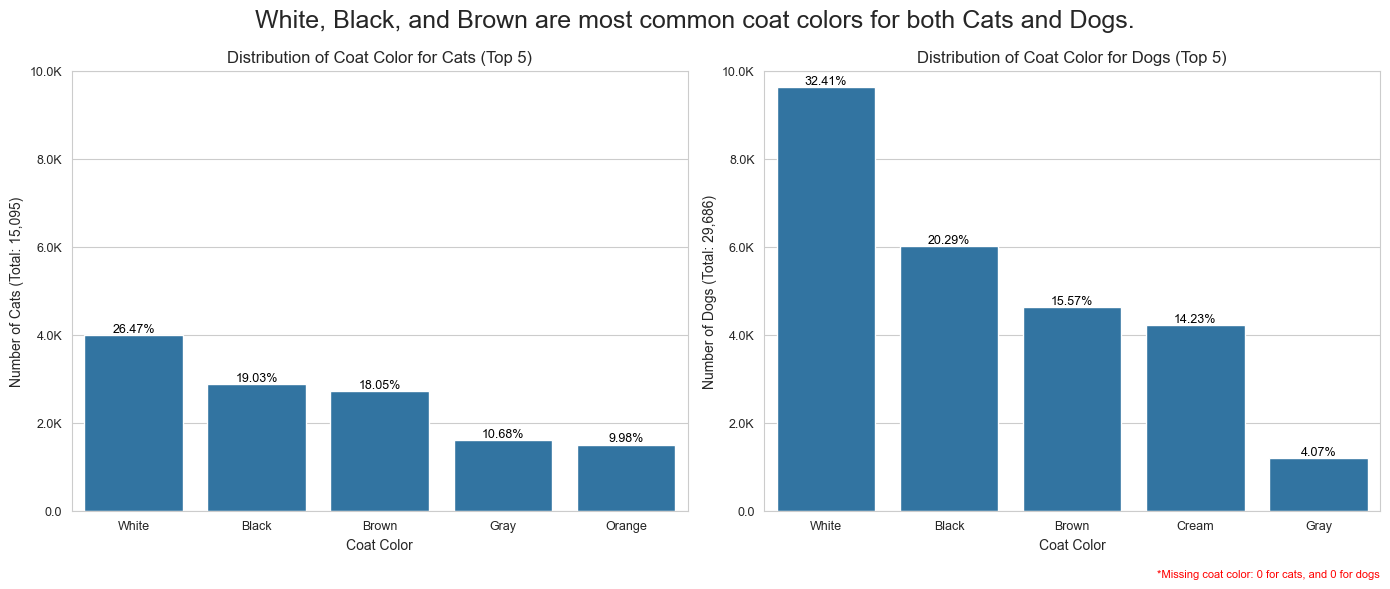

In [9]:
# Function to filter top 5 coat colors for a given animal type
def get_top_coat_colors(df, animal_type, top_n=5):
    # Filter data for the given animal type
    filtered_df = df[df['AnimalType'] == animal_type]
    # Calculate the value counts for CoatColor
    total_counts = filtered_df[AnimalID].count()
    missing = total_counts - filtered_df['CoatColor'].count()
    coat_color_counts = filtered_df['CoatColor'].value_counts().head(top_n)
    # Get the index (coat colors) of the top 5 most common coat colors
    top_coat_colors = coat_color_counts.index.tolist()
    return top_coat_colors, coat_color_counts, total_counts, missing
# Get top 5 coat colors and their counts for Cats and Dogs
top_cats, cat_counts, total_cats, missing_cats = get_top_coat_colors(processed_df, 'Cat')
top_dogs, dog_counts, total_dogs, missing_dogs = get_top_coat_colors(processed_df, 'Dog')
# Determine the maximum count from both datasets
max_count = ((max(cat_counts.max(), dog_counts.max()) // 1000) + 1) * 1000
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))
plt.suptitle('White, Black, and Brown are most common coat colors for both Cats and Dogs.', fontsize=18)
# Create a subplot for Cats
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='CoatColor', data=processed_df[processed_df['AnimalType'] == 'Cat'], order=top_cats)
plt.title('Distribution of Coat Color for Cats (Top 5)')
plt.xlabel('Coat Color')
plt.ylabel('Number of Cats (Total: {:,})'.format(total_cats), fontsize=10)
plt.ylim(0, max_count)  # Set the y-axis limit to the maximum count
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Annotate bars with percentages for Cats
for p in ax1.patches:
    height = p.get_height()
    percentage = (height / total_cats) * 100
    ax1.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Create a subplot for Dogs
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='CoatColor', data=processed_df[processed_df['AnimalType'] == 'Dog'], order=top_dogs)
plt.title('Distribution of Coat Color for Dogs (Top 5)', fontsize=12)
plt.xlabel('Coat Color')
plt.ylabel('Number of Dogs (Total: {:,})'.format(total_dogs), fontsize=10)
plt.ylim(0, max_count)  # Set the y-axis limit to the maximum count
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Annotate bars with percentages for Dogs
for p in ax2.patches:
    height = p.get_height()
    percentage = (height / total_dogs) * 100
    ax2.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Apply the custom y-axis formatter to both subplots
formatter = FuncFormatter(utils.format_y_tick)
plt.gca().yaxis.set_major_formatter(formatter)  # This applies to the last subplot by default
# Get all axes and apply the formatter to each
axes = plt.gcf().get_axes()
for ax in axes:
    ax.yaxis.set_major_formatter(formatter)
# Add footer text
text = "*Missing coat color: {:,} for cats, and {:,} for dogs".format(missing_cats, missing_dogs)
ax2.text(1, -0.15, text, transform=ax2.transAxes, ha='right', color='red', fontsize=8)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

### How does CoatPattern determine the outcome of an animal?

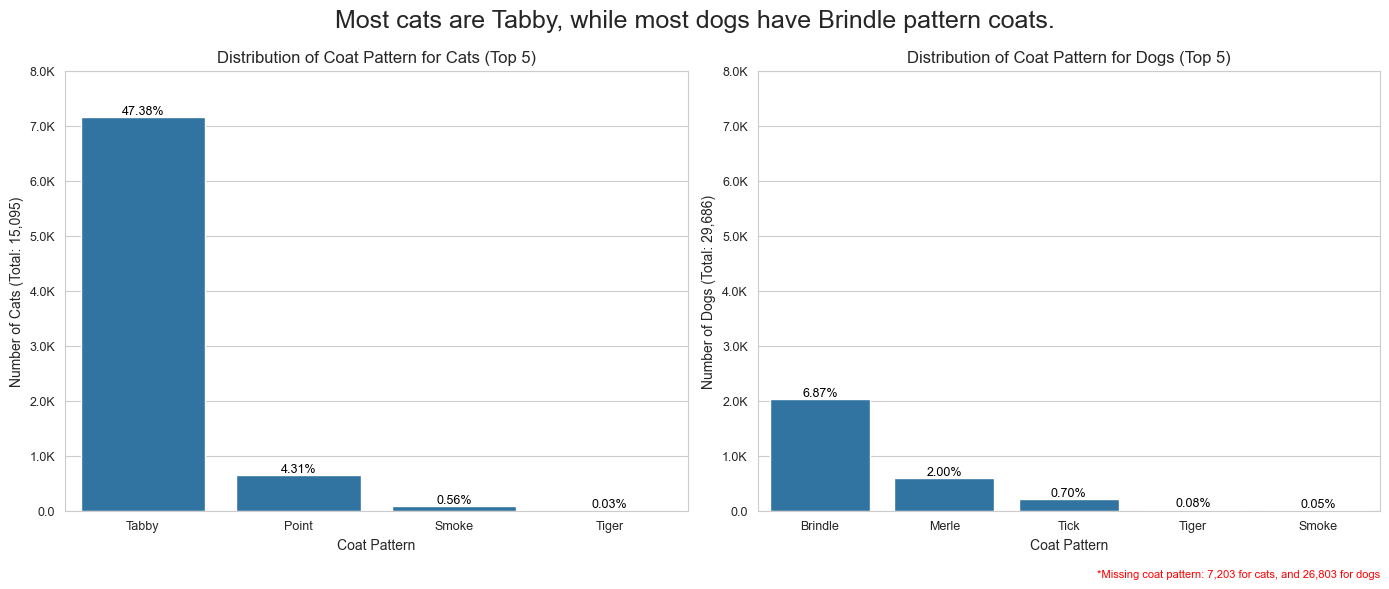

In [10]:
# Function to filter top 5 coat colors for a given animal type
def get_top_coat_pattern(df, animal_type, top_n=5):
    # Filter data for the given animal type
    filtered_df = df[df['AnimalType'] == animal_type]
    # Calculate the value counts for CoatColor
    total_counts = filtered_df[AnimalID].count()
    missing = total_counts - filtered_df['CoatPattern'].count()
    coat_color_counts = filtered_df['CoatPattern'].value_counts().head(top_n)
    # Get the index (coat colors) of the top 5 most common coat colors
    top_coat_colors = coat_color_counts.index.tolist()
    return top_coat_colors, coat_color_counts, total_counts, missing
# Get top 5 coat colors and their counts for Cats and Dogs
top_cats, cat_counts, total_cats, missing_cats = get_top_coat_pattern(processed_df, 'Cat')
top_dogs, dog_counts, total_dogs, missing_dogs = get_top_coat_pattern(processed_df, 'Dog')
# Determine the maximum count from both datasets
max_count = ((max(cat_counts.max(), dog_counts.max()) // 1000) + 1) * 1000
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))
plt.suptitle('Most cats are Tabby, while most dogs have Brindle pattern coats.', fontsize=18)
# Create a subplot for Cats
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='CoatPattern', data=processed_df[processed_df['AnimalType'] == 'Cat'], order=top_cats)
plt.title('Distribution of Coat Pattern for Cats (Top 5)')
plt.xlabel('Coat Pattern')
plt.ylabel('Number of Cats (Total: {:,})'.format(total_cats), fontsize=10)
plt.ylim(0, max_count)  # Set the y-axis limit to the maximum count
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Annotate bars with percentages for Cats
for p in ax1.patches:
    height = p.get_height()
    percentage = (height / total_cats) * 100
    ax1.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Create a subplot for Dogs
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='CoatPattern', data=processed_df[processed_df['AnimalType'] == 'Dog'], order=top_dogs)
plt.title('Distribution of Coat Pattern for Dogs (Top 5)', fontsize=12)
plt.xlabel('Coat Pattern')
plt.ylabel('Number of Dogs (Total: {:,})'.format(total_dogs), fontsize=10)
plt.ylim(0, max_count)  # Set the y-axis limit to the maximum count
# Format axis ticks
plt.tick_params(axis='x', labelsize=9)  # Size for x-axis ticks
plt.tick_params(axis='y', labelsize=9)  # Size for y-axis ticks
# Annotate bars with percentages for Dogs
for p in ax2.patches:
    height = p.get_height()
    percentage = (height / total_dogs) * 100
    ax2.annotate(f'{percentage:.2f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=9, color='black')
# Apply the custom y-axis formatter to both subplots
formatter = FuncFormatter(utils.format_y_tick)
plt.gca().yaxis.set_major_formatter(formatter)  # This applies to the last subplot by default
# Get all axes and apply the formatter to each
axes = plt.gcf().get_axes()
for ax in axes:
    ax.yaxis.set_major_formatter(formatter)
# Add footer text
text = "*Missing coat pattern: {:,} for cats, and {:,} for dogs".format(missing_cats, missing_dogs)
ax2.text(1, -0.15, text, transform=ax2.transAxes, ha='right', color='red', fontsize=8)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

## Conclusion

This exploratory analysis provides insights into the distribution of the dependent variable "OutcomeType", and other factors that effect animal's outcome at the shelter. Results from a machine learning model is expected to in-line with these findings.